### Importing libraries and datasets

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('attrition.csv')

In [3]:
df.head().transpose()

,0,1,2,3,4
Attrition,1,0,1,0,0
Age,41,49,37,33,27
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373,1392,591
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,1,8,2,3,2
Education,2,1,2,4,1
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical
EmployeeCount,1,1,1,1,1
EmployeeNumber,1,2,4,5,7


In [4]:
df.corr()

,Attrition,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,1.000000,-0.159205,-0.056652,0.077924,-0.031373,NaN,-0.010577,-0.103369,-0.006846,-0.130016,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
Age,-0.159205,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,-0.056652,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,0.077924,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,-0.031373,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010577,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,-0.103369,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,-0.006846,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,-0.130016,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976


In [5]:
#converting all categorical variable into object type
cat_list = ['BusinessTravel','EnvironmentSatisfaction','Education','JobInvolvement','JobLevel','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']

In [6]:
for i in cat_list:
    df[i] = df[i].astype('object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Attrition                   1470 non-null int64
Age                         1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null object
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null object
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null object
JobLevel                    1470 non-null object
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null object
MaritalStatus               1470 non-null object
MonthlyIncome     

In [8]:
#dropping insignificant Variable 
df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis = 1, inplace=True)

In [9]:
df.shape

(1470, 31)

#### Checking missing values

In [10]:
df.isnull().sum()

Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Attrition,1470.0,0.161224,0.367863,0.0,0.0,0.0,0.00,1.0
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.0,14235.5,20461.50,26999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.00,9.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.0,14.0,18.00,25.0
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.0,10.0,15.00,40.0


In [12]:
df.describe(include='object').transpose()

,count,unique,top,freq
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
Education,1470,5,3,572
EducationField,1470,6,Life Sciences,606
EnvironmentSatisfaction,1470,4,3,453
Gender,1470,2,Male,882
JobInvolvement,1470,4,3,868
JobLevel,1470,5,1,543
JobRole,1470,9,Sales Executive,326
JobSatisfaction,1470,4,4,459


#### Splitting Target Variable

In [13]:
#predictor variable
predictor = df.iloc[:,df.columns != 'Attrition']
#target variable
target = df.iloc[:,df.columns=='Attrition']

In [14]:
#splitiing DataFrame into numerical and categorical
cat_var = [col for col in predictor.columns.values if predictor[col].dtype=='object']
df_cat = predictor[cat_var]
df_num = predictor.drop(cat_var,axis=1)

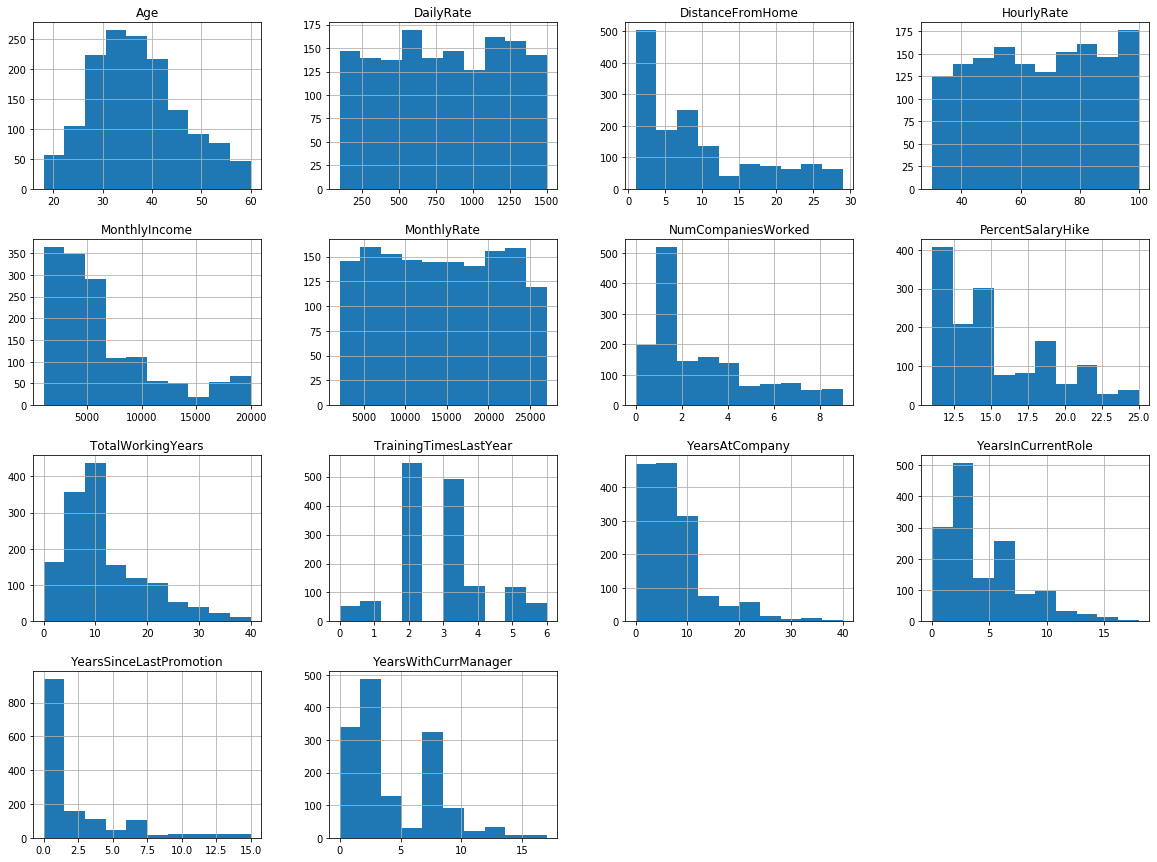

In [15]:
df_num.hist(figsize=(20,15))
plt.show()

#### Dummy Encoding

In [16]:
df_cat_dummies = pd.get_dummies(df_cat,drop_first=True)
print('Numerical Features:',str(len(df_num.columns)))
print('Categorical:',str(len(df_cat_dummies.columns)))

Numerical Features: 14
Categorical: 48


In [17]:
#Merging Numerical and Categorical dataframe after dummy coding
x_data = pd.concat([df_num,df_cat_dummies],axis=1)

In [18]:
#checking the shape of our dataframe after merging of numerical and dummy variable
x_data.shape

(1470, 62)

In [19]:
x_data.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,...,PerformanceRating_4,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,41,1102,1,94,5993,19479,8,11,8,0,...,0,0,0,0,0,0,0,0,0,0
1,49,279,8,61,5130,24907,1,23,10,3,...,1,0,0,1,1,0,0,0,1,0
2,37,1373,2,92,2090,2396,6,15,7,3,...,0,1,0,0,0,0,0,0,1,0
3,33,1392,3,56,2909,23159,1,11,8,3,...,0,0,1,0,0,0,0,0,1,0
4,27,591,2,40,3468,16632,9,12,6,3,...,0,0,0,1,1,0,0,0,1,0


#### Splitting Dataset into Train and Test

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data,target,test_size=0.30,random_state=1)
#print the shapes
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)

x_train: (1029, 62)
y_train: (1029, 1)
x_test: (441, 62)
y_test: (441, 1)


In [21]:
x_train.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,...,PerformanceRating_4,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
99,44,489,23,67,2042,25043,4,12,17,3,...,0,0,1,0,1,0,0,0,0,1
785,40,1492,20,61,10322,26542,4,20,14,6,...,1,0,0,1,1,0,0,0,1,0
918,51,237,9,83,19847,19196,4,24,31,5,...,1,0,0,0,1,0,0,1,0,0
1335,39,835,19,41,3902,5141,8,14,7,2,...,0,1,0,0,0,0,1,0,1,0
1182,36,894,1,33,4374,15411,0,15,4,6,...,0,0,1,0,0,0,0,0,1,0


### Decision Tree Classifier

In [22]:
#importing Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
clf_DT = DecisionTreeClassifier(criterion='entropy',random_state=1)

In [23]:
#Building a Decision Tree and performing predictions on test set
model_DT = clf_DT.fit(x_train,y_train)
#predicting from the model
y_pred = model_DT.predict(x_test)

#### Plotting the ROC Curve for Decision Tree Classifier

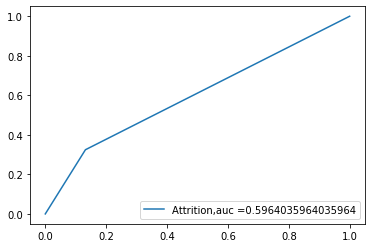

In [24]:
#Calculate the predicted probability 
y_pred_prob = model_DT.predict_proba(x_test)[::,1]
#creating the roc curve on y_test and y_pred_prob
fpr,tpr,_ = roc_curve(y_test,y_pred_prob)
#find area under roc curve
auc = roc_auc_score(y_test,y_pred_prob)
plt.plot(fpr,tpr,label='Attrition,auc ='+str(auc))
plt.legend(loc=4)
plt.show()

#### Results

In [25]:
#create a list of parameter 
cols= ['Model','ROC Score','Precision Score','Recall Score','Accuracy Score']
models_report = pd.DataFrame(columns = cols)
#Create a result associated with the list mentioned above
tmp2 = pd.Series({'Model':"Decision Tree with Entropy",
                  'ROC Score':roc_auc_score(y_test,y_pred_prob),
                  'Precision Score':precision_score(y_test,y_pred),
                  'Recall Score':recall_score(y_test,y_pred),
                  'Accuracy Score':accuracy_score(y_test,y_pred)})
#append in model report 
model_dt1_report = models_report.append(tmp2,ignore_index=True)
model_dt1_report

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score
0,Decision Tree with Entropy,0.596404,0.342466,0.324675,0.773243


### GridSearch CV

In [26]:
#set the paramenters for grid search
grid_search_parmas = {'criterion':['gini','entropy'],
                      'min_samples_split':[2],
                      'max_depth':[None,2,3],
                      'min_samples_leaf':[1,5],
                      'max_leaf_nodes':[None]}

In [27]:
from sklearn.model_selection import GridSearchCV
# Building a train model after doing Grid Search
classifier = DecisionTreeClassifier()
model_DT_grid = GridSearchCV(classifier,grid_search_parmas,cv=10)
#Creating a train model 
model_DT_grid.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3], 'max_leaf_nodes': [None]

In [28]:
#best parameters
model_DT_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [29]:
test_pred = model_DT_grid.predict(x_test)

In [30]:
cc = accuracy_score(y_test,test_pred)
print("Accuracy is:",cc)

Accuracy is: 0.8276643990929705


In [31]:
cm = confusion_matrix(y_test,test_pred)
cm

array([[356,   8],
       [ 68,   9]], dtype=int64)

In [32]:
#Building Decision Tree after Getting best parameter from grid search
clf_DT1 = DecisionTreeClassifier(criterion='entropy',max_depth=3,max_leaf_nodes=None,min_samples_leaf=1,min_samples_split=2)

In [33]:
model_DT1 = clf_DT1.fit(x_train,y_train)
y_pred1 = model_DT1.predict(x_test)

In [34]:
#Confusion Matrix
confusion_matrix(y_pred1,y_test)

array([[356,  68],
       [  8,   9]], dtype=int64)

In [35]:
#Results
tmp2= pd.Series({'Model':"DT with GridSearch",
                 'ROC Score':roc_auc_score(y_test,y_pred1),
                 'Recall Score':recall_score(y_test,y_pred1),
                 'Precision Score':precision_score(y_test,y_pred1),
                 'Accuracy Score':accuracy_score(y_test,y_pred1)
                 })

model_dt1_report_grid = models_report.append(tmp2,ignore_index=True)
model_dt1_report_grid

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score
0,DT with GridSearch,0.547453,0.529412,0.116883,0.827664


### RandomForest

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
#Building a Random Forest
rf = RandomForestClassifier(n_estimators=10)
#train model
model_rf = rf.fit(x_train,y_train)
#predicting the model
y_pred2 = model_rf.predict(x_test)

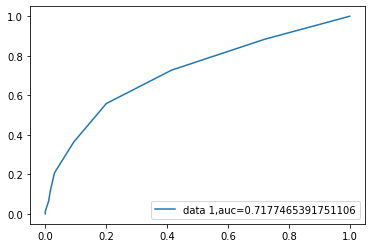

In [38]:
#ROC Curve of Random Forest Classifier
y_pred2_prob = model_rf.predict_proba(x_test)[::,1]
#creating the roc curve on y_test and y_pred2_prob
fpr,tpr,_ = roc_curve(y_test,y_pred2_prob)
auc = roc_auc_score(y_test,y_pred2_prob)
plt.plot(fpr,tpr,label='data 1,auc='+str(auc))
plt.legend(loc=4)
plt.show()

#### Grid Search for Random Forest

In [39]:
#set the parameters for grid search
grid_search_params1 = {'n_estimators':[200,500],
                       'max_features':['auto','sqrt','log2'],
                       'max_depth':[4,5,6,7,8],
                       'criterion':['gini','entropy']}

In [40]:
# performing grid search on Random Forest
# Create an instance of Random Forest Classifier()
classifier = RandomForestClassifier()

# Use GridSearchCV() , pass the values you have set for grid search
model_RF_Grid = GridSearchCV(classifier, grid_search_params1,cv = 10)
#Create a train model after performing grid search
model_RF_Grid.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [41]:
#Getting the best parameter for Random Forest Classifier using Grid Search
model_RF_Grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
model_RF_Grid.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [43]:
#Performing predictions of the trained model using test data
test_pred1 = model_RF_Grid.predict(x_test)

In [44]:
# After doing grid search , the accuracy of our random forest model changed from 82.5 to 83.6

cc1 = accuracy_score(y_test,test_pred1)
print("Accuracy is",cc)

Accuracy is 0.8276643990929705


In [45]:
#Create random tree classifier object
rf = RandomForestClassifier(criterion = 'entropy',max_depth=7,max_features='sqrt',n_estimators=500)

# Train Model
model_grid = rf.fit(x_train,y_train)

# Predicting the model
y_pred3 = model_grid.predict(x_test)

In [46]:
confusion_matrix(y_pred3, y_test)

array([[362,  71],
       [  2,   6]], dtype=int64)

In [47]:
# Create a result associated with the list mentioned above.
tmp2 = pd.Series({'Model': " Random Forest with Grid Search ",
                 'ROC Score' : roc_auc_score(y_test, y_pred3),
                 'Precision Score': precision_score(y_test, y_pred3),
                 'Recall Score': recall_score(y_test, y_pred3),
                 'Accuracy Score': accuracy_score(y_test, y_pred3)})

# Below code will append the above tmp2 series in model_report dataframe
model_rf1_report_gs = models_report.append(tmp2, ignore_index = True)
model_rf1_report_gs

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score
0,Random Forest with Grid Search,0.536214,0.75,0.077922,0.834467
